In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('colorblind')

In [2]:
cards = pd.read_csv('data/dataset-cards.csv', sep = ';')
customers = pd.read_csv('data/dataset-customers.csv', sep = ';')
frauds = pd.read_csv('data/dataset-frauds.csv', sep = ';')
transactions = pd.read_csv('data/dataset-transactions.csv', sep = ';')

In [3]:
transactions_selector = transactions['id'].isin(frauds['transaction_id'])
frauds_transactions = transactions[transactions_selector]

# Teste 1: Em algum intervalo possui maior ocorrência de transações fraudulentas

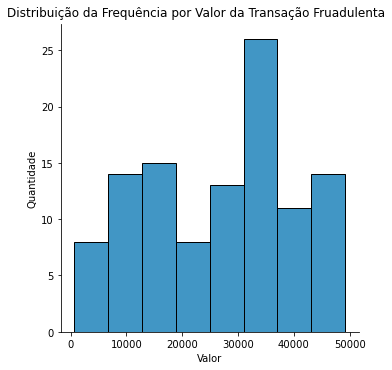

In [4]:
def distribuicao_freq(dataset, data, titulo, xlabel, ylabel):
    distribuicao = sns.displot(dataset, x = data,)
    fig = distribuicao.fig 
    fig.suptitle(titulo, fontsize=12, y = 1.02)
    distribuicao.set(xlabel= xlabel, ylabel= ylabel)

distribuicao_freq(frauds_transactions, 'value', 'Distribuição da Frequência por Valor da Transação Fruadulenta',
                  'Valor', 'Quantidade')

In [5]:
frauds_transactions['value'].describe()

count      109.000000
mean     26808.880734
std      13574.318372
min        683.000000
25%      14586.000000
50%      29746.000000
75%      36706.000000
max      49155.000000
Name: value, dtype: float64

In [6]:
fraud_transaction_0_10K = (frauds_transactions['value'] > 0000) & (frauds_transactions['value'] < 10000)
fraud_transaction_10K_20K = (frauds_transactions['value'] > 10000) & (frauds_transactions['value'] < 20000)
fraud_transaction_20K_30K = (frauds_transactions['value'] > 20000) & (frauds_transactions['value'] < 30000)
fraud_transaction_30K_40K = (frauds_transactions['value'] > 30000) & (frauds_transactions['value'] < 40000)
fraud_transaction_40K_50K = (frauds_transactions['value'] > 40000) & (frauds_transactions['value'] < 50000)

In [7]:
frauds_transactions[fraud_transaction_0_10K].describe()

,value
count,19.000000
mean,6670.263158
std,2763.737362
min,683.000000
25%,5540.500000
50%,8038.000000
75%,8786.500000
max,9587.000000


In [8]:
frauds_transactions[fraud_transaction_10K_20K].describe()

,value
count,18.000000
mean,14835.333333
std,2595.019664
min,10423.000000
25%,13022.250000
50%,15334.000000
75%,16902.750000
max,18851.000000


In [9]:
frauds_transactions[fraud_transaction_20K_30K].describe()

,value
count,18.000000
mean,25110.944444
std,3283.759314
min,20660.000000
25%,21873.250000
50%,25328.500000
75%,27490.250000
max,29746.000000


In [10]:
frauds_transactions[fraud_transaction_30K_40K].describe()

,value
count,36.000000
mean,34779.194444
std,2417.949129
min,30262.000000
25%,33037.250000
50%,34670.000000
75%,36771.000000
max,38744.000000


In [11]:
frauds_transactions[fraud_transaction_40K_50K].describe()

,value
count,18.000000
mean,45797.166667
std,2923.390019
min,40751.000000
25%,43670.000000
50%,45783.500000
75%,48498.750000
max,49155.000000


In [12]:
pd.read_excel('data/Resultado_Anlise_Fraudes.xlsx')

,Intervalo,Quantidade de Dados
0,0 - 10.000,19
1,10.000 - 20.000,18
2,20.000 - 30.000,18
3,30.000 - 40.000,36
4,40.000 - 50.000,18
5,Total de Dados,109


- **Conclusão Teste 1:** A partir do histograma em relação ao valor das transações fraudulentas é possível notar uma ocorrência maior no intervalo entre 30K e 40K, separando esses intervalos e analisando seus dados foi possível determinar que no intervalo de 30K a 40K há aproximadamente o dobro de ocorrência de fraudes.

# Teste 2: A família do cartão tem relação com as transações fraudulentas

In [13]:
fraud_transaction_cards_selector = cards['card_number'].isin(frauds_transactions['card_number'])
fraud_transaction_cards = cards[fraud_transaction_cards_selector]
card_dict = pd.Series(fraud_transaction_cards.card_family.values,index=fraud_transaction_cards.card_number).to_dict()
frauds_transactions['card_family'] = frauds_transactions['card_number'].map(card_dict)

<ipython-input-13-1868bf681709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds_transactions['card_family'] = frauds_transactions['card_number'].map(card_dict)


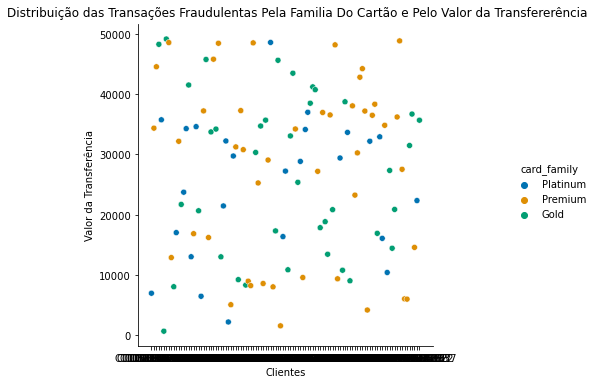

In [14]:
def relational_plot(x,y,hue,data,title,xlabel,ylabel):
    rel_plot = sns.relplot(x=x, y=y, hue=hue, data=data)
    fig = rel_plot.fig
    fig.suptitle(title, y=1.02)
    rel_plot.set(xlabel=xlabel,ylabel=ylabel)

relational_plot('id','value','card_family',frauds_transactions,'Distribuição das Transações Fraudulentas Pela Familia Do Cartão e Pelo Valor da Transfererência',
'Clientes', 'Valor da Transferência')



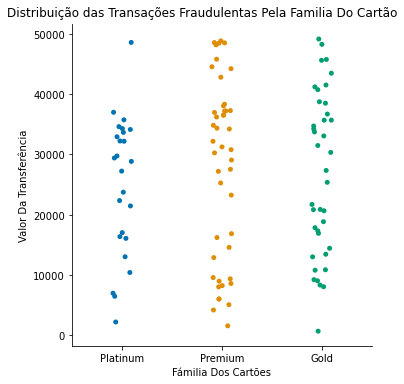

In [15]:
grafico_valor_card_family2 = sns.catplot(x='card_family', y='value', data=frauds_transactions)
fig = grafico_valor_card_family2.fig
fig.suptitle('Distribuição das Transações Fraudulentas Pela Familia Do Cartão', y= 1.02)
grafico_valor_card_family2.set(xlabel= 'Fámilia Dos Cartões', ylabel= 'Valor Da Transferência')

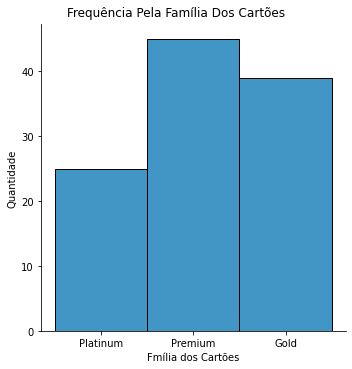

In [16]:
distribuicao_freq(frauds_transactions,'card_family', 'Frequência Pela Família Dos Cartões', 'Fmília dos Cartões', 'Quantidade')

In [17]:
group_frauds_transactions = frauds_transactions.groupby('card_family')

In [18]:
round(group_frauds_transactions.describe(),2)

value                                                         \
            count      mean       std     min      25%      50%      75%   
card_family                                                                
Gold         39.0  26779.95  13419.99   683.0  15680.0  27347.0  37605.5   
Platinum     25.0  25074.56  11480.96  2211.0  16377.0  28851.0  33666.0   
Premium      45.0  27797.47  14904.20  1570.0  12894.0  31255.0  37279.0   

                      
                 max  
card_family           
Gold         49155.0  
Platinum     48588.0  
Premium      48845.0

- **Conclusão Teste 2:** A partir dos gráficos não é possível vizualizar nenhum padrão significante, separando os dados pela família do cartão e olhando suas principais estatísticas támbem não é possível chegar a nenhuma conclusão plausível. Dessa forma podemos afirmar que a família do cartão não tem relação significante com as transações fraudulentas.

# Teste 3: Há alguma relação entre a data das transações e as transações fraudulentas

In [19]:
frauds_transactions['transaction_date'] = pd.to_datetime(frauds_transactions['transaction_date'])
frauds_transactions = frauds_transactions.sort_values(by='transaction_date')
frauds_transactions.index = range(frauds_transactions.shape[0])

<ipython-input-19-52a7b2bc7caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds_transactions['transaction_date'] = pd.to_datetime(frauds_transactions['transaction_date'])


In [20]:
frauds_transactions

,id,card_number,transaction_date,value,segment,card_family
0,CTID89585938,1519-5130-5810-8539,2016-01-03,36219,SEG11,Premium
1,CTID26555772,5734-5619-8469-4044,2016-01-11,683,SEG22,Gold
2,CTID81479835,3295-6390-4452-7199,2016-01-16,41525,SEG17,Gold
3,CTID92439353,8159-1257-4706-7544,2016-01-17,5079,SEG11,Premium
4,CTID99663510,8783-7271-8493-7931,2016-01-18,6044,SEG17,Premium
...,...,...,...,...,...,...
104,CTID30763806,6722-7299-6082-7974,2016-12-17,40751,SEG21,Gold
105,CTID41668436,4012-7774-6690-7055,2016-12-23,6477,SEG20,Platinum
106,CTID95859840,4856-2191-9879-6388,2016-12-24,34214,SEG21,Gold
107,CTID30494187,9018-5320-5729-5393,2016-12-31,14586,SEG20,Premium


In [21]:
qtd_by_month = frauds_transactions.groupby([frauds_transactions['transaction_date'].dt.year.rename('year'), frauds_transactions['transaction_date'].dt.month.rename('month')]).agg({'count'})

In [22]:
qtd_by_month['quantidade'] = [9,10,9,9,7,10,7,9,14,8,7,10]

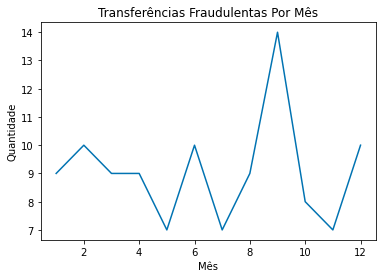

In [23]:
def time_series_plot(x, y, data, title, xlabel, ylabel):
    time_series = sns.lineplot(x=x, y=y, data=data)
    time_series.set_title(title)
    time_series.set_xlabel(xlabel)
    time_series.set_ylabel(ylabel)

time_series_plot('month','quantidade',qtd_by_month,'Transferências Fraudulentas Por Mês','Mês','Quantidade')

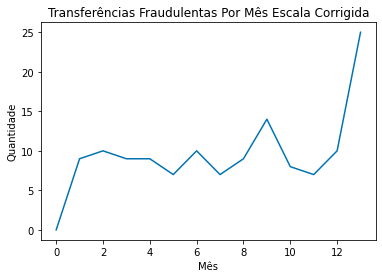

In [24]:
transaction_by_month = pd.DataFrame( columns = ['month', 'qntd'])
transaction_by_month['month'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
transaction_by_month['qntd'] = [0,9,10,9,9,7,10,7,9,14,8,7,10,25]

time_series_plot('month','qntd',transaction_by_month,'Transferências Fraudulentas Por Mês Escala Corrigida','Mês','Quantidade')

- **Conclusão Teste 3:**  Após separar a ocorrência de fraudes por mês e gerar a primeira *time series*, foi possível vizualizar uma discrepância aparentemente significativa no mês 09, porém analizando os valores foi possível concluir que essa discrepância era fruto da escala do gráfico, após a correção da escala e a analize dos valores foi possível concluir que as transações fraudulentas não possuem uma relação significativa com a data.

# Teste 4: Idade dos clientes está relacionada com as transações fraudulentas

In [25]:
card_dict2 = pd.Series(cards.customer_id.values,index=cards.card_number).to_dict()
frauds_transactions['customer_id'] = frauds_transactions['card_number'].map(card_dict2)

card_dict3 = pd.Series(customers.age.values,index=customers.id).to_dict()
frauds_transactions['age'] = frauds_transactions['customer_id'].map(card_dict3)

card_dict4 = pd.Series(cards.credit_limit.values,index=cards.card_number).to_dict()
frauds_transactions['credit_limit'] = frauds_transactions['card_number'].map(card_dict4)


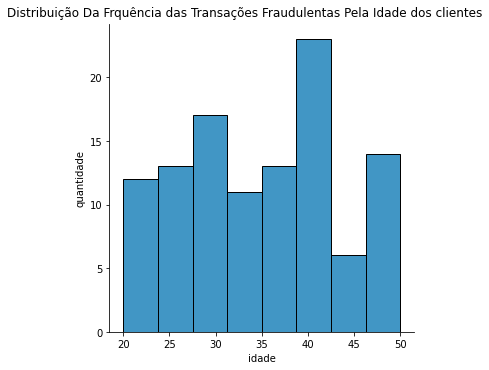

In [26]:
distribuicao_freq(frauds_transactions,'age','Distribuição Da Frquência das Transações Fraudulentas Pela Idade dos clientes','idade','quantidade')

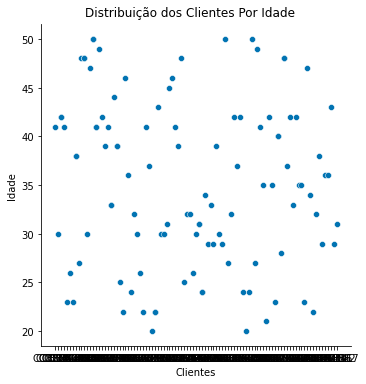

In [27]:
age_plot = sns.relplot(data=frauds_transactions, x='customer_id', y='age')
fig = age_plot.fig
fig.suptitle('Distribuição dos Clientes Por Idade',y=1.02)
age_plot.set(xlabel= 'Clientes', ylabel= 'Idade')


In [28]:
frauds_transactions.groupby('age').describe()

value                                                                    \
    count          mean           std      min       25%      50%       75%   
age                                                                           
20    2.0  24003.500000   4728.423046  20660.0  22331.75  24003.5  25675.25   
21    1.0  23258.000000           NaN  23258.0  23258.00  23258.0  23258.00   
22    5.0  32833.000000  11528.029060  16082.0  32198.00  32930.0  34367.00   
23    4.0  14787.250000   7606.730939   6044.0   9610.25  15821.5  20998.50   
24    5.0  33983.800000   7032.397898  27538.0  30798.00  31486.0  34290.00   
25    2.0  21323.000000  17455.638000   8980.0  15151.50  21323.0  27494.50   
26    3.0  19775.666667  22651.479341   4195.0   6783.50   9372.0  27566.00   
27    3.0  41346.000000   6300.734957  36966.0  37735.50  38505.0  43536.00   
28    1.0  31255.000000           NaN  31255.0  31255.00  31255.0  31255.00   
29    5.0  22067.400000  10048.238492  13450.0  14586.00  17855.0  27242.00   
30    7.0  28345.571429  14822.270135    683.0  25149.00  29746.0  34423.50   
31    4.0  18837.500000  10051.043478   8038.0  14176.00  17536.5  22198.00   
32    5.0  34768.000000  11788.731760  16377.0  30339.00  38340.0  44234.00   
33    4.0  30758.000000   9222.205340  17038.0  29565.25  34719.0  35911.75   
34    2.0  22610.500000  13546.044607  13032.0  17821.25  22610.5  27399.75   
35    4.0  39987.500000   9891.088565  29079.0  32877.00  41209.0  48319.50   
36    3.0  18429.333333  19347.327318   6477.0   7268.50   8060.0  24405.50   
37    3.0  27736.333333  15086.723214  10423.0  22572.00  34721.0  36393.00   
38    3.0  11812.000000  10104.416015   2211.0   6541.00  10871.0  16612.50   
39    5.0  23384.800000  10650.158482   9236.0  16857.00  25274.0  28851.00   
40    2.0  26303.000000  13272.394283  16918.0  21610.50  26303.0  30995.50   
41    8.0  32853.250000  16861.743206   5079.0  28961.50  36610.5  44658.00   
42    8.0  33602.375000  12755.753861   8337.0  31558.25  37252.5  39439.25   
43    2.0  20599.000000  19254.517652   6984.0  13791.50  20599.0  27406.50   
44    1.0  17320.000000           NaN  17320.0  17320.00  17320.0  17320.00   
45    1.0  27204.000000           NaN  27204.0  27204.00  27204.0  27204.00   
46    2.0  33383.500000   4414.467635  30262.0  31822.75  33383.5  34944.25   
47    2.0  29228.000000   5437.651147  25383.0  27305.50  29228.0  31150.50   
48    6.0  17144.666667  14061.359617   6002.0   8443.25  11031.5  21062.75   
49    2.0  11240.500000   2338.402125   9587.0  10413.75  11240.5  12067.25   
50    4.0  25713.250000  21187.658694   1570.0  11224.00  27829.0  42318.25   

             credit_limit                                                    \
         max        count           mean            std       min       25%   
age                                                                           
20   27347.0          2.0   36000.000000    1414.213562   35000.0   35500.0   
21   23258.0          1.0  121000.000000            NaN  121000.0  121000.0   
22   48588.0          5.0  187400.000000   51983.651276  159000.0  163000.0   
23   21462.0          4.0  229250.000000  304852.286635   28000.0   40750.0   
24   45807.0          5.0  301200.000000  318658.437830   13000.0  113000.0   
25   33666.0          2.0  313000.000000  260215.295477  129000.0  221000.0   
26   45760.0          3.0  180666.666667  153154.605981   20000.0  108500.0   
27   48567.0          3.0  153666.666667  165246.280846    4000.0   65000.0   
28   31255.0          1.0  266000.000000            NaN  266000.0  266000.0   
29   37204.0          5.0  190800.000000  178476.048813   36000.0   46000.0   
30   48845.0          7.0  308000.000000  355697.905532   21000.0   68000.0   
31   32239.0          4.0  185250.000000  105793.430798   45000.0  132750.0   
32   44550.0          5.0  279600.000000  261796.294855   50000.0  122000.0   
33   36556.0          4.0  125500.000000  204257.1908

In [29]:
age_1 = (frauds_transactions['age'] >= 20) & (frauds_transactions['age'] <= 25)
age_2 = (frauds_transactions['age'] >= 26) & (frauds_transactions['age'] <= 30)
age_3 = (frauds_transactions['age'] >= 31) & (frauds_transactions['age'] <= 35)
age_4 = (frauds_transactions['age'] >= 36) & (frauds_transactions['age'] <= 40)
age_5 = (frauds_transactions['age'] >= 41) & (frauds_transactions['age'] <= 45)
age_6 = (frauds_transactions['age'] >= 46) & (frauds_transactions['age'] <= 50)

In [30]:
frauds_transactions[age_1].describe()

,value,age,credit_limit
count,19.000000,19.000000,19.000000
mean,26691.789474,22.789474,219947.368421
std,11390.173199,1.474937,223225.713793
min,6044.000000,20.000000,13000.000000
25%,20752.000000,22.000000,79000.000000
50%,27538.000000,23.000000,163000.000000
75%,33298.000000,24.000000,264500.000000
max,48588.000000,25.000000,835000.000000


In [31]:
frauds_transactions[age_2].describe()

,value,age,credit_limit
count,19.000000,19.000000,19.000000
mean,27546.105263,28.526316,230473.684211
std,14430.687798,1.540866,243174.689934
min,683.000000,26.000000,4000.000000
25%,16220.500000,27.000000,41000.000000
50%,29746.000000,29.000000,164000.000000
75%,37085.000000,30.000000,316000.000000
max,48845.000000,30.000000,858000.000000


In [32]:
frauds_transactions[age_3].describe()

,value,age,credit_limit
count,19.000000,19.000000,19.000000
mean,30389.105263,32.842105,221105.263158
std,12271.957735,1.462994,191123.547807
min,8038.000000,31.000000,8000.000000
25%,17944.500000,32.000000,53000.000000
50%,32239.000000,33.000000,150000.000000
75%,37448.000000,34.000000,372000.000000
max,48453.000000,35.000000,686000.000000


In [33]:
frauds_transactions[age_4].describe()

,value,age,credit_limit
count,16.000000,16.00000,16.000000
mean,21466.437500,38.00000,196562.500000
std,12982.890038,1.36626,277230.822902
min,2211.000000,36.00000,2000.000000
25%,10126.250000,37.00000,26000.000000
50%,19636.000000,38.00000,80000.000000
75%,34962.750000,39.00000,170000.000000
max,40751.000000,40.00000,879000.000000


In [34]:
frauds_transactions[age_5].describe()

,value,age,credit_limit
count,20.000000,20.000000,20.000000
mean,30868.350000,41.950000,302150.000000
std,14507.986995,1.099043,309735.587575
min,5079.000000,41.000000,6000.000000
25%,20614.750000,41.000000,29750.000000
50%,35985.000000,42.000000,131000.000000
75%,39439.250000,42.000000,596250.000000
max,49155.000000,45.000000,866000.000000


In [35]:
frauds_transactions[age_6].describe()

,value,age,credit_limit
count,16.000000,16.000000,16.0000
mean,22089.062500,48.250000,237687.5000
std,14563.756074,1.341641,247094.7777
min,1570.000000,46.000000,30000.0000
25%,9451.250000,47.750000,33750.0000
50%,19093.000000,48.000000,136000.0000
75%,33931.000000,49.250000,441250.0000
max,45625.000000,50.000000,802000.0000


In [36]:
age_by_interval = pd.DataFrame( columns = ['age_interval', 'qntd'])
age_by_interval['age_interval'] = ['20 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 45', '46 - 50']
age_by_interval['qntd'] = [19, 19, 19, 16, 20 ,16]


In [37]:
age_by_interval

,age_interval,qntd
0,20 - 25,19
1,26 - 30,19
2,31 - 35,19
3,36 - 40,16
4,41 - 45,20
5,46 - 50,16


- **Conclusão Teste 4:** Preparando o *dataset* e plotando o histograma, foi possível vizualizar uma discrepância no intervalo de 40 a 45 anos, já no outro gráfico indica que não há uma dispersão padronizada, separando as idades em intervalos e observando os dados é possível concluir que não há um padrão quanto a idade dos clientes que tiveram seus cartões fraudados, ou seja, podemos concluir que a idade não possui relação significante com as transações fraudulentas.

# Teste 5: O limite dos cartões tem relação com as transações fraudulentas

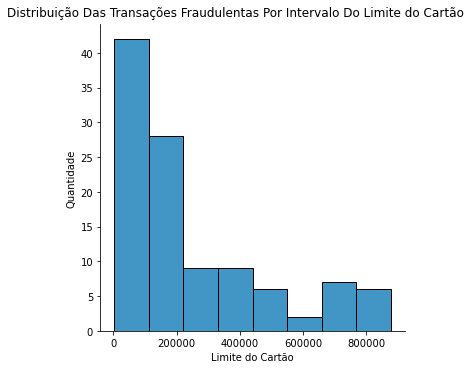

In [38]:
distribuicao_freq(frauds_transactions,'credit_limit','Distribuição Das Transações Fraudulentas Por Intervalo Do Limite do Cartão',
                  'Limite do Cartão','Quantidade')

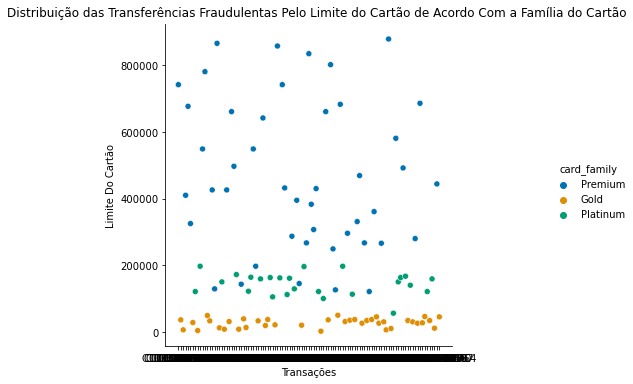

In [39]:
relational_plot('id','credit_limit','card_family',frauds_transactions,'Distribuição das Transferências Fraudulentas Pelo Limite do Cartão de Acordo Com a Família do Cartão','Transações','Limite Do Cartão')

- **Conclusão Teste 5:** Vizualizando os dois gráficos é possível determinar que a maior parte das transações fraudilentas são feitas de cartões com limite menor que 200K, porém considerando 64 das 109 transações são feitas de cartões "Gold" e "Platinum" que possuem um limite máximo menor ou igual a 200K, a variável observada demonstra não possuir significância para a análise em questão, permitindo concluir que não há uma relação significante entre as transações fraudulentas e o limite do cartão.

- **Conclusão Geral:** Após a realização de todos os testes, é possível concluir que o único dado obtido que possui alguma significância é o fato de que no intervalo de transações fraudulentas com valor entre 30K e 40K, há aproximadamente o dobro de ocorrência de fraudes. Nos demais teste não foi possível observar mas nenhuma relação significantes entre os dados observados e as transações fraudulentas. 